# Pymaceuticals Inc.
---

### Analysis

Three observations that can be made from the Pymaceuticals data: 

* Looking at the data summary there were no mice thats tumor volume reached zero. If the study were to be extended there is potential that some regimens may shrink tumor volume entirely.

* If you refer to the distribution of mice sex across all regimens, The distribution of female and male mice in this study are almost equal and should not be considered relevant for this study however another measure that could be observed is the relative size of tumors between each sex and their volume decreases compared during the trials
  
* From the 4 regimensnts Capomulin and Ramicane reduces the size of tumors bet, compared to the Infubinol or Ceftamin regimens. However from the Capomulin treatment line graph we can see that after the 30 days the volume of the tumour began to increase, therefor extended effectiveness of these drugs would need to be measured to draw better conclusions of the longterm effectiveness of Capomulin.er.ed.
 

In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single DataFrame
# The datasets are merged into a single DataFrame. (6 points)
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])
merged_data_df = merged_data_df.rename(columns={'Age_months': 'Age (months)'})
# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [199]:
# Checking the number of mice.
# The number of mice are shown from the merged DataFrame. (2 points)
MiceTotal = len(merged_data_df['Mouse ID'].unique())
print(MiceTotal)

249


In [200]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Each duplicate mice is found based on the Mouse ID and Timepoint. (6 points)
MiceDuplicate = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
MiceDuplicate_ID = merged_data_df.loc[MiceDuplicate, 'Mouse ID'].unique()

In [201]:
MiceDuplicates = merged_data_df.loc[merged_data_df['Mouse ID'] == MiceDuplicate_ID[0]]
MiceDuplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [202]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# A clean DataFrame is created with the dropped duplicate mice. (4 points)
analysis_data_df = merged_data_df.drop(MiceDuplicates.index)
analysis_data_df.to_csv('data/analysis_data.csv', index=False, header=True)

In [203]:
MiceNoDuplicate = len(analysis_data_df['Mouse ID'].unique())
print(MiceNoDuplicate)

248


## Summary Statistics

In [204]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# The mean of the tumor volume for each regimen is calculated using groupby. (2 points)
# The media of the tumor volume for each regimen is calculated using groupby. (2 points)
# The variance of the tumor volume for each regimen is calculated using groupby. (2 points)
# The standard deviation of the tumor volume for each regimen is calculated using groupby. (2 points)
# Assemble the resulting series into a single summary DataFrame.
drug_gp = analysis_data_df.groupby('Drug Regimen')
mean = drug_gp['Tumor Volume (mm3)'].mean()
median = drug_gp['Tumor Volume (mm3)'].median()
var = drug_gp['Tumor Volume (mm3)'].var()
std = drug_gp['Tumor Volume (mm3)'].std()
sem = drug_gp['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})
summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [205]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# The SEM of the tumor volume for each regimen is calculated using groupby. (2 points)
# Using the aggregation method, produce the same summary statistics in a single line
# A new DataFrame is created with using the summary statistics. (5 points)
summary_table = drug_gp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})
summary_agg_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [206]:
#Cdisplay how many mice per regimen
Mice_per_regimen = drug_gp['Mouse ID'].count().sort_values(ascending=False)
Mice_per_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

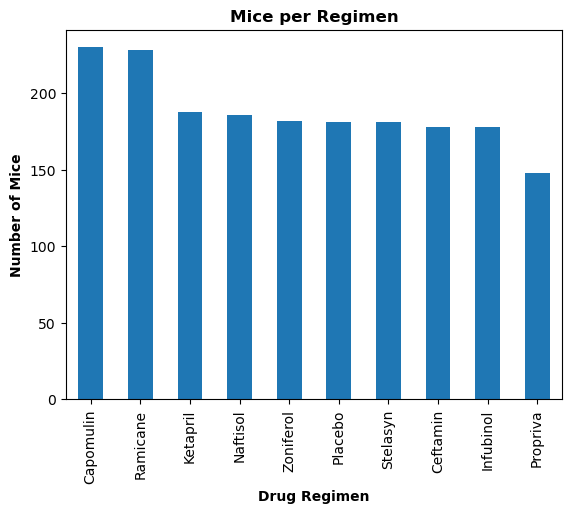

In [207]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# A bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas is generated. (4.5 points)
pd_bar_mice_per_regimen = Mice_per_regimen.plot(kind='bar', width=0.5)
pd_bar_mice_per_regimen.set_title(label='Mice per Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_ylabel('Number of Mice', fontweight = 'bold')
plt.show()


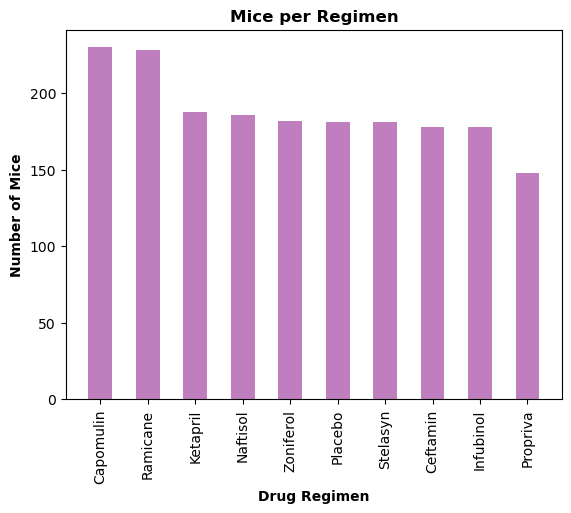

In [208]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# A bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot is generated. (4.5 points)
x_axis_regimen = np.arange(len(Mice_per_regimen))
regimen_name = list(Mice_per_regimen.index.values)
py_bar_mice_per_regimen = plt.bar(x_axis_regimen, Mice_per_regimen, color='purple', alpha=0.5, width=0.5)
plt.xticks(x_axis_regimen, regimen_name, rotation='vertical')
plt.title('Mice per Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')
plt.show()

In [209]:
sex_mice = analysis_data_df.groupby('Sex')['Sex'].count()
sex_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

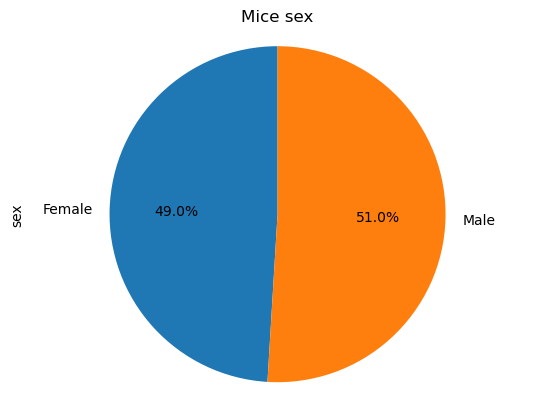

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# A pie plot showing the distribution of female versus male mice using Pandas is generated. (3 points)
pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis("equal")
pd_pie_mice_sex.set_title(label='Mice sex')
pd_pie_mice_sex.set_ylabel('sex')
plt.show()

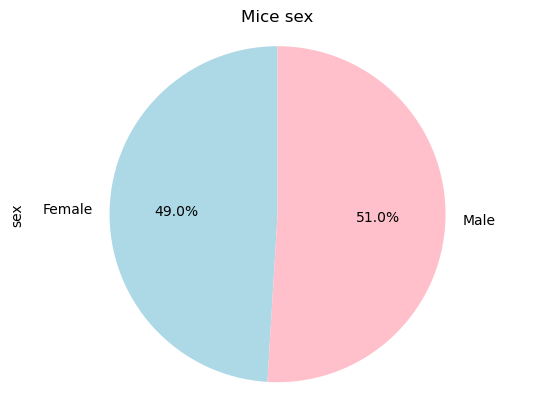

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# A pie plot showing the distribution of female versus male mice using pyplot is generated. (3 points)
sex = sex_mice.index
colors = ['lightblue','pink']
py_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=90)
plt.axis("equal")
plt.title('Mice sex')
plt.ylabel('sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [212]:
# The index of the DataFrame is reset. (2 points)
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  # Capomulin, Ramicane, Infubinol, and Ceftamin
# The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list. (3 points)
# Start by getting the last (greatest) timepoint for each mouse
# Retrieve the maximum timepoint for each mouse. (2 points)
final_tumor_vol = analysis_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()


In [213]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol_list = []
for drug in regimen:
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    final_tumor_vol_list.append(final_tumor_vol) 
# Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = q3-q1    
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
# Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
    print(f"{drug}: Tumor volume below {round(lower_bound,2)} is a potential outlier")
    print(f"{drug}: Tumor volume above {round(upper_bound,2)} is a potential outlier")
    print(f"{drug}: Average tumor volume is: {round(mean,2)}")
    print(f"{drug}: Outliers: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'{drug}: Outlier\'s tumor volume(mm3) is {round(outliers[i], 2)}')


Capomulin: Tumor volume below 20.7 is a potential outlier
Capomulin: Tumor volume above 51.83 is a potential outlier
Capomulin: Average tumor volume is: 36.67
Capomulin: Outliers: 0
Ramicane: Tumor volume below 17.91 is a potential outlier
Ramicane: Tumor volume above 54.31 is a potential outlier
Ramicane: Average tumor volume is: 36.19
Ramicane: Outliers: 0
Infubinol: Tumor volume below 36.83 is a potential outlier
Infubinol: Tumor volume above 82.74 is a potential outlier
Infubinol: Average tumor volume is: 58.18
Infubinol: Outliers: 1
Infubinol: Outlier's tumor volume(mm3) is 36.32
Ceftamin: Tumor volume below 25.36 is a potential outlier
Ceftamin: Tumor volume above 87.67 is a potential outlier
Ceftamin: Average tumor volume is: 57.75
Ceftamin: Outliers: 0


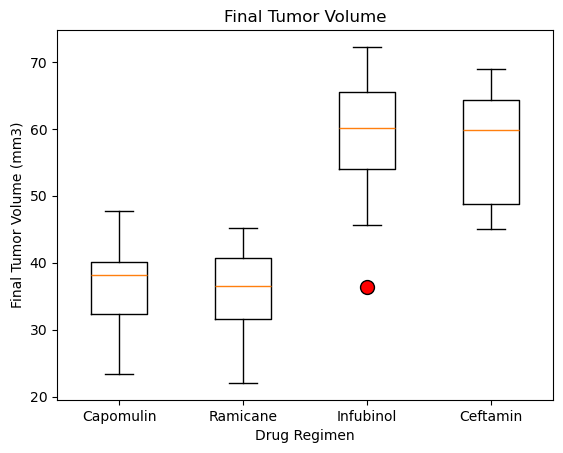

In [214]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})
final_tumor_plot.set_title('Final Tumor Volume')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

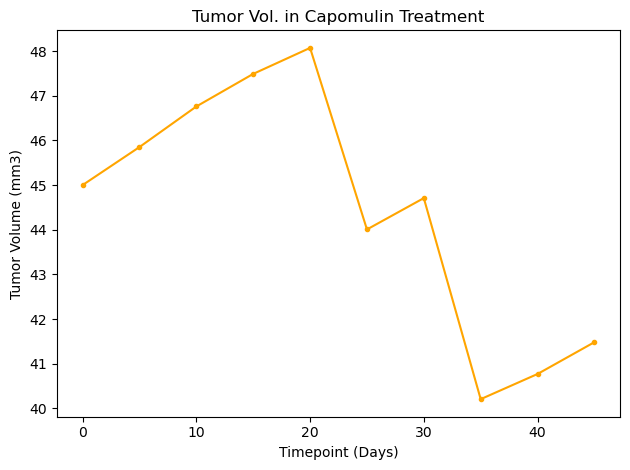

In [215]:
# Generate dataframe only in Capomulin Regimen
Capomulin_df = analysis_data_df.loc[analysis_data_df['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='.', color='#FFA500')
plt.title(f"Tumor Volume forCapomulin")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


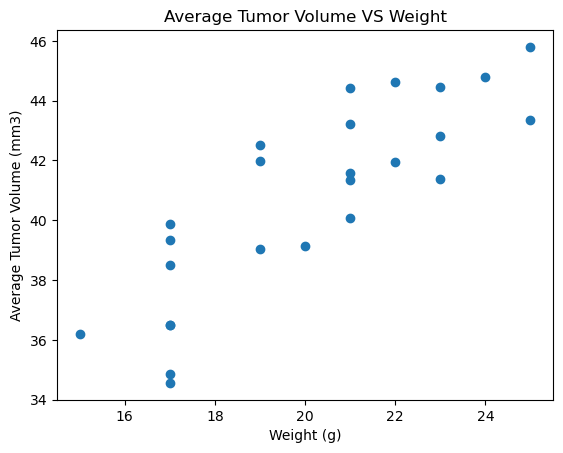

In [216]:
# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
Capomulin_df = analysis_data_df.loc[analysis_data_df['Drug Regimen'] == 'Capomulin']
mice_weight_avg = Capomulin_df['Weight (g)']
mice_tumor_avg = Capomulin_df['Tumor Volume (mm3)']
x=Capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
y=Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume VS Weight')
plt.show()

## Correlation and Regression

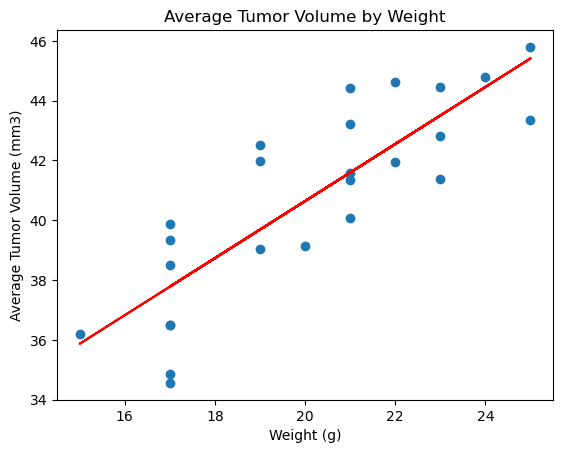

In [217]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mice_weight_avg = Capomulin_df['Weight (g)']
mice_tumor_avg = Capomulin_df['Tumor Volume (mm3)']
x_values = mice_weight_avg
y_values = mice_tumor_avg
correlation = round(st.pearsonr(x_values, y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()